In [79]:
import pandas as pd
import numpy as np
from pandas import DataFrame 
from sklearn import linear_model 
import statsmodels.api as sm

In [80]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [81]:
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})
y=df.price
x=df[['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus' ]]

In [82]:
x

,area,bedrooms,bathrooms,stories,furnishingstatus
0,7420,4,2,3,2
1,8960,4,4,4,2
2,9960,3,2,2,1
3,7500,4,2,2,2
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,0
541,2400,3,1,1,1
542,3620,2,1,1,0
543,2910,3,1,1,2


In [83]:
reg.coef_

array([3.60829835e+02, 1.77599121e+05, 1.15327324e+06, 5.16759724e+05,
       3.80160963e+05])

In [84]:
reg.intercept_

-388396.40876316186

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
reg.fit(X_train, y_train)

LinearRegression()

In [89]:
reg = linear_model.LinearRegression()
reg.fit(x,y)
x=sm.add_constant(x)

In [90]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           3.03e-93
Time:                        13:46:15   Log-Likelihood:                -8420.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.884e+05   2.47e+05     -1.571      0.117   -8.74e+05    9.71e+04
area               360.8298     25.505     14.148      0.000     310.729     410.931
bedrooms          1.776e+05   8.31e+04      2.136      0.033    1.43e+04    3.41e+05
bathrooms         1.153e+06   1.19e+05      9.691      0.000     9.2e+05    1.39e+06
stories           5.168e+05   6.91e+04      7.474      0.000    3.81e+05    6.53e+05
furnishingstatus  3.802e+05   7.21e+04      5.276      0.000    2.39e+05    5.22e+05
==============================================================================
Omnibus:                       92.560   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.128
Skew:                           0.901   Prob(JB):                     2.35e-46
Kurtosis:                       5.451   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
reg.score(X_test, y_test)

0.525807997410633

ValueError: x and y must be the same size

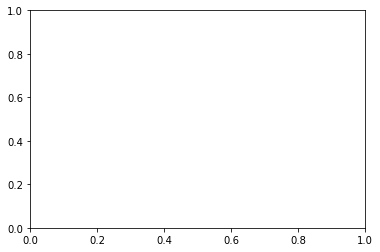

In [94]:
fig, ax = plt.subplots()
ax.scatter(x, y, c="green", alpha=0.5, marker=r'$\clubsuit$',
           label="Luck")
ax.set_xlabel("Leprechauns")
ax.set_ylabel("Gold")
ax.legend()
plt.show()

In [ ]:
new = {'area': [7000], 'bedrooms': [4], 'bathrooms':[3], 'stories':[2], 'furnishingstatus': [1]}
df2=pd.DataFrame(new,columns =['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus'])


In [ ]:
df2

In [ ]:
y_pred=reg.predict(df2)
y_pred

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
#Question2

In [95]:
df = pd.read_csv("Bank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [97]:
y=df[['Personal Loan']]
x=df[['Age', 'Experience', 'Income', 'Education']]

In [99]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
X_train.shape

(4000, 4)

In [102]:
x.shape

(5000, 4)

In [103]:
X_test.shape

(1000, 4)

In [104]:
X_test

,Age,Experience,Income,Education
398,54,30,23,1
3833,33,9,83,1
4836,54,24,72,3
4572,32,7,81,3
636,40,16,120,1
...,...,...,...,...
4228,34,10,83,2
2367,26,1,80,1
788,58,34,10,1
1452,54,28,52,1


In [105]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_pred

/Users/elizabethrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

ValueError: Data must be 1-dimensional

In [108]:
metrics.accuracy_score(y_test, y_pred)

0.953

In [110]:
new2={'Age':[50,70,80,30,25], 
      'Experience':[20,33,37,11,20], 'Income':[70,80,83,54,72], 'Education':[1,2,3,2,3]}
df3=pd.DataFrame(new2,columns= ['Age', 'Experience', 'Income', 'Education'])

In [112]:
y_pred=logistic_regression.predict(df3)

print (df3)
print (y_pred)

   Age  Experience  Income  Education
0   50          20      70          1
1   70          33      80          2
2   80          37      83          3
3   30          11      54          2
4   25          20      72          3
[0 0 0 0 0]
